In [1]:
import pandas as pd
import numpy as np
import librosa
from python_speech_features import mfcc, logfbank, ssc

from preprocessing import preprocessing

In [2]:
features_param={
    "winlen":0.025,
    "winstep":0.33,
    "numcep":128,
    "nfilt":128,
    "nfft":1024,
    "preemph":0.97,
    "ceplifter":22,
    "appendEnergy":True,
    "winfunc":np.hamming  #choix parmi : np.bartlett, np.blackman, np.hamming, np.hanning, np.kaiser
               }

In [3]:
data_dict = preprocessing("Path_DF.csv",features_param)

Choisisir le type de machine parmi :
['fan' 'pump' 'slider' 'ToyCar' 'ToyConveyor' 'valve'] fan
Choisisir l'ID de la machine :[0 2 4 6] 4


In [4]:
#vérification des dimensions des données obtenues
for i in data_dict:
    print(i,'a pour dimension',data_dict[i].shape)

y_train a pour dimension (1866,)
y_test a pour dimension (896,)
X_train a pour dimension (1866, 160000)
X_test a pour dimension (896, 160000)
X_mfcc_train a pour dimension (1866, 32, 128)
X_mfcc_test a pour dimension (896, 32, 128)
X_fbank_train a pour dimension (1866, 32, 128)
X_fbank_test a pour dimension (896, 32, 128)
X_ssc_train a pour dimension (1866, 32, 128)
X_ssc_test a pour dimension (896, 32, 128)


In [5]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dense, Dropout, Flatten, BatchNormalization, ReLU, Reshape

model_conv = Sequential()

# Première couche Encoder

model_conv.add(Conv2D(filters = 32, kernel_size = (5, 5), strides = (1,2), padding = 'same', input_shape = (32, 128,1)))
model_conv.add(BatchNormalization())
model_conv.add(ReLU())

# Seconde couche Encoder

model_conv.add(Conv2D(filters = 64, kernel_size = (5, 5), strides = (1,2), padding = 'same'))
model_conv.add(BatchNormalization())
model_conv.add(ReLU())

# Troisième couche Encoder

model_conv.add(Conv2D(filters = 128, kernel_size = (5, 5), strides = (2,2), padding = 'same'))
model_conv.add(BatchNormalization())
model_conv.add(ReLU())

# Quatrième couche Encoder

model_conv.add(Conv2D(filters = 256, kernel_size = (3, 3), strides = (2,2), padding = 'same'))
model_conv.add(BatchNormalization())
model_conv.add(ReLU())

# Cinquième couche Encoder

model_conv.add(Conv2D(filters = 512, kernel_size = (3, 3), strides = (2,2), padding = 'same'))
model_conv.add(BatchNormalization())
model_conv.add(ReLU())

# Couche goulot

model_conv.add(Conv2D(filters = 40, kernel_size = (4, 4), strides = (1,1), padding = 'valid'))
model_conv.add(Flatten())

# Première couche Encoder

model_conv.add(Dense(4*4*512))
model_conv.add(Reshape((4,4,512)))

# Seconde couche Encoder

model_conv.add(Conv2DTranspose(filters = 256, kernel_size = (3, 3), strides = (2,2), padding = 'same'))
model_conv.add(BatchNormalization())
model_conv.add(ReLU())

# Troisième couche Encoder

model_conv.add(Conv2DTranspose(filters = 128, kernel_size = (3, 3), strides = (2,2), padding = 'same'))
model_conv.add(BatchNormalization())
model_conv.add(ReLU())

# Quatrième couche Encoder

model_conv.add(Conv2DTranspose(filters = 64, kernel_size = (5, 5), strides = (2,2), padding = 'same'))
model_conv.add(BatchNormalization())
model_conv.add(ReLU())

# Cinquième couche Encoder

model_conv.add(Conv2DTranspose(filters = 32, kernel_size = (5, 5), strides = (1,2), padding = 'same'))
model_conv.add(BatchNormalization())
model_conv.add(ReLU())

# Couche de reconstruction 

model_conv.add(Conv2DTranspose(filters = 1, kernel_size = (5, 5), strides = (1,2), padding = 'same'))

# On compile 

model_conv.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
                   metrics = [tf.keras.metrics.MeanAbsoluteError()])


model_conv.summary()

C:\Users\Gisla\anaconda3\envs\Py3-7\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Gisla\anaconda3\envs\Py3-7\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Gisla\anaconda3\envs\Py3-7\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Gisla\anaconda3\envs\Py3-7\lib\site-packages\tensorflow\python\f

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\Gisla\anaconda3\envs\Py3-7\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Gisla\anaconda3\envs\Py3-7\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Gisla\anaconda3\envs\Py3-7\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Gisla\anaconda3\envs\Py3-7\lib\site-package

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 64, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 64, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 32, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       2

In [6]:
from tensorflow.keras import callbacks

# Callback pour arrêter l'entrainement et récupérer le meilleur modèle si la métrique ne diminue plus pendant 10 epochs
early_stopping = callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)

training_history = model_conv.fit(data_dict["X_mfcc_train"].reshape(-1,32,128,1), data_dict["X_mfcc_train"].reshape(-1,32,128,1), batch_size = 64, epochs = 100, callbacks=[early_stopping],validation_split = 0.2)

Train on 1492 samples, validate on 374 samples
Epoch 1/100
1492/1492 [==============================] - 133s 89ms/sample - loss: 79.7640 - mean_absolute_error: 5.4738 - val_loss: 2302.6535 - val_mean_absolute_error: 24.0812
Epoch 2/100
1492/1492 [==============================] - 25s 17ms/sample - loss: 70.4978 - mean_absolute_error: 5.2335 - val_loss: 12539.1456 - val_mean_absolute_error: 55.0369
Epoch 3/100
1492/1492 [==============================] - 24s 16ms/sample - loss: 68.4378 - mean_absolute_error: 5.1641 - val_loss: 1681.5732 - val_mean_absolute_error: 17.5832
Epoch 4/100
1492/1492 [==============================] - 24s 16ms/sample - loss: 67.2007 - mean_absolute_error: 5.1166 - val_loss: 497.8666 - val_mean_absolute_error: 10.6015
Epoch 5/100
1492/1492 [==============================] - 24s 16ms/sample - loss: 65.8816 - mean_absolute_error: 5.0796 - val_loss: 210.6639 - val_mean_absolute_error: 7.7490
Epoch 6/100
1492/1492 [==============================] - 24s 16ms/sample -

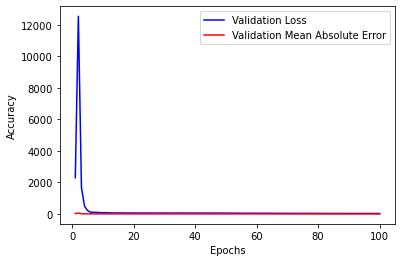

In [7]:
import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline

# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe de la précision sur l'échantillon d'entrainement
plt.plot(np.arange(1 , 101, 1),
         training_history.history['val_loss'],
         label = 'Validation Loss',
         color = 'blue')

# Courbe de la précision sur l'échantillon de validation
plt.plot(np.arange(1 , 101, 1),
         training_history.history['val_mean_absolute_error'], 
         label = 'Validation Mean Absolute Error',
         color = 'red')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()

In [8]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
pred = model_conv.predict(data_dict["X_mfcc_test"].reshape(-1,32,128,1))

y_MAE = []
for i in range(data_dict["X_mfcc_test"].shape[0]):
    y_MAE.append(mean_absolute_error(data_dict["X_mfcc_test"].reshape(-1,32*128)[i,:], pred.reshape(-1,32*128)[i,:]))

y_pred = []
seuil = 5.5
for i in y_MAE:
    if i>seuil : y_pred.append(1)
    else : y_pred.append(0)
y_pred.count(1)

618

In [23]:
y_MSE = []
for i in range(data_dict["X_mfcc_test"].shape[0]):
    y_MSE.append(mean_squared_error(data_dict["X_mfcc_test"].reshape(-1,32*128)[i,:], pred.reshape(-1,32*128)[i,:]))

y_pred2 = []
seuil = 80
for i in y_MSE:
    if i>seuil : y_pred2.append(1)
    else : y_pred2.append(0)
y_pred2.count(1)

568

In [24]:
print(metrics.classification_report(data_dict["y_test"], y_pred))

cnf_matrix = metrics.confusion_matrix(data_dict["y_test"], y_pred)
print(cnf_matrix)

              precision    recall  f1-score   support

           0       0.18      0.25      0.21       200
           1       0.76      0.67      0.71       696

    accuracy                           0.58       896
   macro avg       0.47      0.46      0.46       896
weighted avg       0.63      0.58      0.60       896

[[ 50 150]
 [228 468]]


In [25]:
print(metrics.classification_report(data_dict["y_test"], y_pred2))

cnf_matrix = metrics.confusion_matrix(data_dict["y_test"], y_pred2)
print(cnf_matrix)

              precision    recall  f1-score   support

           0       0.18      0.29      0.22       200
           1       0.75      0.61      0.67       696

    accuracy                           0.54       896
   macro avg       0.46      0.45      0.45       896
weighted avg       0.62      0.54      0.57       896

[[ 58 142]
 [270 426]]
